In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/BGT211-YZ-Proje(Reyhan Aslantaş)')
!pwd

/content/drive/MyDrive/BGT211-YZ-Proje(Reyhan Aslantaş)


In [ ]:
import pandas as pd #veri analizi
import numpy as np #veri setindeki tüm işlemler,saysal hesaplamalar
import tensorflow as tf #Makine öğrenimi modelleri oluşturmak için
import matplotlib.pyplot as plt

from keras.models import Sequential #keras'ta kullanılır,katmanları sıralı şekilde eklemek için
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D #flatten->düzleştirme yapmak için.
from keras.utils import to_categorical

In [ ]:
X_train = pd.read_csv("yz12hafta/mnist_train.csv")
X_test= pd.read_csv("yz12hafta/mnist_test.csv")

In [ ]:
#sınıflara göre ayırım işlemi

y_train = X_train.iloc[:, 0]
y_test = X_test.iloc[:, 0]

X_train = X_train.drop(X_train.columns[0], axis=1)
X_test = X_test.drop(X_test.columns[0], axis=1)

In [ ]:
#yeniden boyutlandırma işlemleri 28-28 piksel olarak
X_train = X_train.values
X_test = X_test.values

X_train=X_train.reshape(X_train.shape[0], 28, 28)
X_test=X_test.reshape(X_test.shape[0], 28, 28)

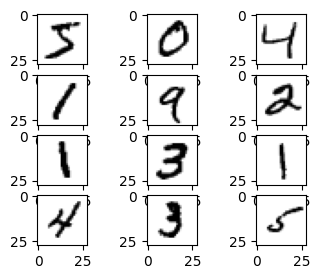

In [ ]:
#veri setinde düzelen resimlerin bilgisi
plt.figure(figsize=(4,3))
for i in range(12):
  plt.subplot(4, 3, i+1)
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [ ]:
#önişleme adımları için yeniden boyutlandırma
X_train=X_train.reshape(60000, 28,28,1)
X_test=X_test.reshape(10000, 28,28,1)


In [ ]:
#sınıf işlemleri için kategori dönüşümü
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#normalizasyon işlemleri
X_train=X_train / 255
X_test=X_test / 255

In [ ]:
#keras ile derin öğrenme modelinin kurulumu
input_shape =(28,28,1)
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

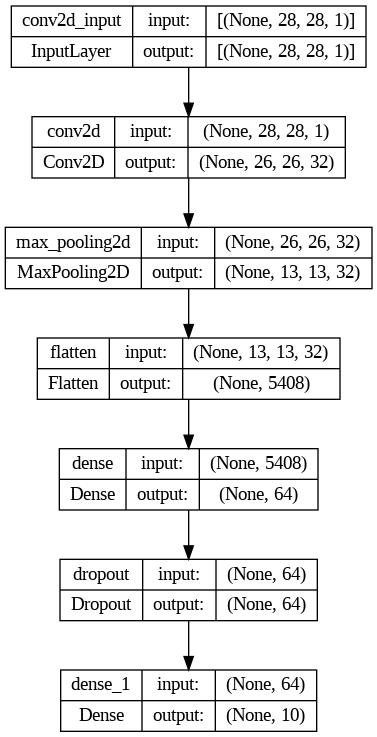

In [ ]:
tf.keras.utils.plot_model(model, "mnist12h.jpg", show_shapes=True, show_layer_names=True)
#tf.keras.utils.plot_model: Bu fonksiyon, bir Keras modelinin mimarisini görselleştirmek için kullanılır.
#Modelin katmanlarını, bağlantıları ve giriş/çıkışları gösteren bir diyagram oluşturur.
#show_shapes=True: Katmanların şekillerini (giriş/çıkış boyutları) gösterir.
#show_layer_names=True: Her katmanın adını gösterir.

In [ ]:
history = model.fit(X_train, y_train, verbose=2, epochs=5, batch_size=16, validation_split=0.2)
# 0.2 ->%20 test, %80 eğitim için ayır. epochs->eğitim adım sayısı
#verbose=2: Eğitim sürecinin çıktı düzeyini kontrol eder

Epoch 1/5
3000/3000 - 39s - loss: 0.3478 - accuracy: 0.8947 - val_loss: 0.1182 - val_accuracy: 0.9647 - 39s/epoch - 13ms/step
Epoch 2/5
3000/3000 - 36s - loss: 0.1702 - accuracy: 0.9480 - val_loss: 0.0902 - val_accuracy: 0.9766 - 36s/epoch - 12ms/step
Epoch 3/5
3000/3000 - 35s - loss: 0.1347 - accuracy: 0.9589 - val_loss: 0.0795 - val_accuracy: 0.9775 - 35s/epoch - 12ms/step
Epoch 4/5
3000/3000 - 37s - loss: 0.1106 - accuracy: 0.9656 - val_loss: 0.0781 - val_accuracy: 0.9782 - 37s/epoch - 12ms/step
Epoch 5/5
3000/3000 - 35s - loss: 0.0997 - accuracy: 0.9686 - val_loss: 0.0698 - val_accuracy: 0.9805 - 35s/epoch - 12ms/step
